In [1]:
%matplotlib inline
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def load_dataset(path: Path) -> pd.DataFrame:
    df = pd.read_json(path)
    df.date = pd.to_datetime(df.date, format="%Y-%m-%d %H:%M:%S")
    df.set_index('date', inplace=True)
    return df


In [27]:
df_hydra = load_dataset("../datasets/Hydra-L.json")
df_hydra.head()


,BME280_temp,BME280_humidity,BME280_pressure
date,,,
2022-07-06 00:00:04,30.45,34.93,746.19
2022-07-06 00:00:29,30.55,34.55,745.17
2022-07-06 00:00:30,28.27,43.74,746.70
2022-07-06 00:00:32,30.62,35.08,746.40
2022-07-06 00:00:33,27.05,45.82,746.68


In [43]:
df_resampled = df_hydra.resample('12h').mean()

In [44]:
df_ref = load_dataset("../datasets/reference.json")
df_ref.head()

,temperature,pressure
date,,
2022-07-01 14:00:00,22,752
2022-07-01 22:00:00,19,753
2022-07-02 14:00:00,25,752
2022-07-02 22:00:00,23,751
2022-07-03 14:00:00,29,749


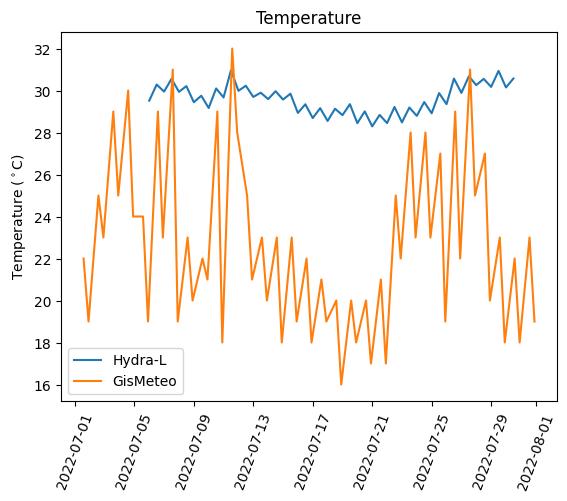

In [45]:
plt.plot(df_resampled.index, df_resampled.BME280_temp, label='Hydra-L')
plt.plot(df_ref.index, df_ref.temperature, label='GisMeteo')

plt.title('Temperature')
plt.xticks(rotation=70)
plt.ylabel(r'Temperature ($^\circ$C)')
plt.legend()
plt.show()


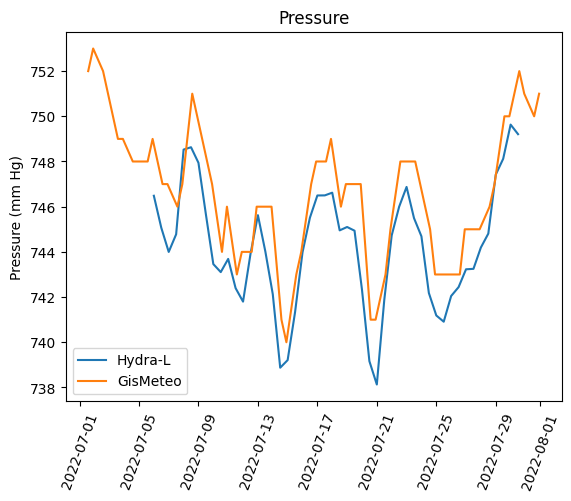

In [46]:
plt.plot(df_resampled.index, df_resampled.BME280_pressure, label='Hydra-L')
plt.plot(df_ref.index, df_ref.pressure, label='GisMeteo')

plt.title('Pressure')
plt.xticks(rotation=70)
plt.ylabel(r'Pressure (mm Hg)')
plt.legend()
plt.show()
